In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz

## Read post and comment data and drop columns not used at current stage

In [136]:
post = pd.read_csv("./SHIBArmy_submission_1yr.csv")

In [137]:
post.head()

,index,id,day,utc,title,author,author_fullname,author_created_utc,url,score
0,1,npl6q0,2021-05-31,1622519996,What are the Pro's and Con's of staking SHIB o...,u/TANKLVMC,u/t2_a5clylu0,1.612344e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...,5
1,2,npl5np,2021-05-31,1622519880,Has $Shib the highest percentage of your portf...,u/Supersandryx,u/t2_buzhz1as,1.620643e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...,8
2,3,npl5gl,2021-05-31,1622519855,Received a reply from Robinhood,u/Ankush2021,u/t2_cgew3skd,1.622519e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...,1
3,4,npl18y,2021-05-31,1622519435,can SHIB hit another ATH?,u/sittaman,u/t2_45p2j39,1.497539e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...,16
4,5,npkz7l,2021-05-31,1622519243,The same wallet address on Etherscan has been ...,u/Comegetsome74,u/t2_c3cnmy83,1.621091e+09,https://www.reddit.com/r/SHIBArmy/comments/npk...,7


In [138]:
post = post.drop(columns=['index','title','author_fullname','score'])

In [396]:
post.head()

,id,day,utc,author,author_created_utc,url
0,npl6q0,2021-05-31,1622519996,u/TANKLVMC,1.612344e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...
1,npl5np,2021-05-31,1622519880,u/Supersandryx,1.620643e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...
2,npl5gl,2021-05-31,1622519855,u/Ankush2021,1.622519e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...
3,npl18y,2021-05-31,1622519435,u/sittaman,1.497539e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...
4,npkz7l,2021-05-31,1622519243,u/Comegetsome74,1.621091e+09,https://www.reddit.com/r/SHIBArmy/comments/npk...


In [140]:
comm = pd.read_csv("./SHIBArmy_comment_1yr.csv")

In [141]:
comm.head()

,index,id,day,utc,title,author,author_fullname,author_created_utc,url,score
0,1,h05nv97,2021-05-31,1622519999,I wonder if it has to do with India lifting cr...,u/Shibajinkyp,u/t2_c48jq3p3,1.620945e+09,https://www.reddit.com/r/SHIBArmy/comments/npk...,4
1,2,h05nuuc,2021-05-31,1622519991,Ah ok dang that sucks. I hope this gets resolv...,u/Gold_Diamonds,u/t2_9oo4o8yl,1.612227e+09,https://www.reddit.com/r/SHIBArmy/comments/nph...,1
2,3,h05nung,2021-05-31,1622519988,my target i want to clear all debts and also ...,u/boris7003,u/t2_bk34k,1.367663e+09,https://www.reddit.com/r/SHIBArmy/comments/npg...,2
3,4,h05nuj8,2021-05-31,1622519986,That’s not where they got it unfortunately,u/DogecoinToMars,u/t2_a26bysmp,1.611940e+09,https://www.reddit.com/r/SHIBArmy/comments/npk...,1
4,5,h05nu28,2021-05-31,1622519978,"My thoughts. Fuck haters, fud spreaders, n FOM...",u/Doggybone_treat,u/t2_a2crd2gh,1.611959e+09,https://www.reddit.com/r/SHIBArmy/comments/npk...,3


In [142]:
comm = comm.drop(columns=['index', 'id', 'title', 'author_fullname', 'score'])

In [143]:
post.head()

,id,day,utc,author,author_created_utc,url
0,npl6q0,2021-05-31,1622519996,u/TANKLVMC,1.612344e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...
1,npl5np,2021-05-31,1622519880,u/Supersandryx,1.620643e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...
2,npl5gl,2021-05-31,1622519855,u/Ankush2021,1.622519e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...
3,npl18y,2021-05-31,1622519435,u/sittaman,1.497539e+09,https://www.reddit.com/r/SHIBArmy/comments/npl...
4,npkz7l,2021-05-31,1622519243,u/Comegetsome74,1.621091e+09,https://www.reddit.com/r/SHIBArmy/comments/npk...


## Drop null data (user deleted) and draw number of post/submission each day

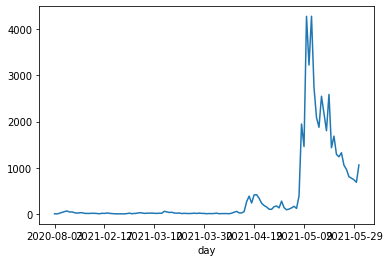

In [145]:
post = post[post['author_created_utc'].notnull()]
comm = comm[comm['author_created_utc'].notnull()]
post.groupby('day').aggregate(['count'])['id']['count'].plot()

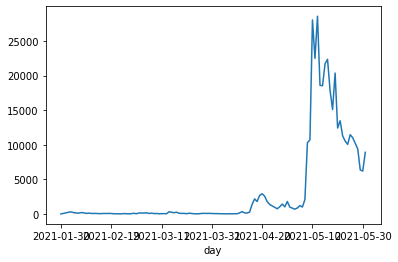

In [274]:
comm.groupby('day').aggregate(['count'])['author']['count'].plot()

### Define a function that draw histogram with rebinning

In [284]:
def draw_hist_rebin(data, col, rebin, logy, logx = False):
    rebin_joined_data = pd.cut(data[col], rebin)
    rebin_joined_data.value_counts().plot.bar(logy = logy)

## Join comment and post data

In [152]:
comm['post_id'] = comm['url'].apply(lambda x: x.split("https://www.reddit.com/r/SHIBArmy/comments/")[1].split("/")[0])

In [172]:
joined_data = post.merge(comm, left_on="id", right_on="post_id", how='left')

In [174]:
joined_data = joined_data[joined_data['day_y'].notnull()]

In [192]:
joined_data['time_diff'] = (joined_data['utc_y'] - joined_data['utc_x']).apply(lambda x: int(x)) // (3600)

/Users/chenxu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Rebin data and draw comment-post time diff histogram

In [272]:
rebin_joined_data = pd.cut(joined_data[joined_data['day_x'] < '2021-05-01']['time_diff'], [-1,24,120,720, 4500])
rebin_joined_data.value_counts()/sum(rebin_joined_data.value_counts())

(-1, 24]       0.873696
(120, 720]     0.058793
(24, 120]      0.037625
(720, 4500]    0.029886
Name: time_diff, dtype: float64

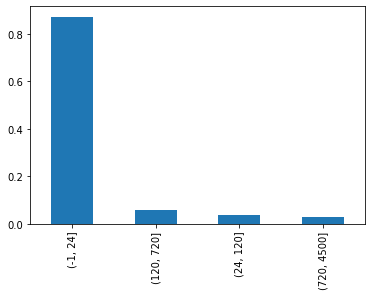

In [279]:
(rebin_joined_data.value_counts()/sum(rebin_joined_data.value_counts())).plot.bar()

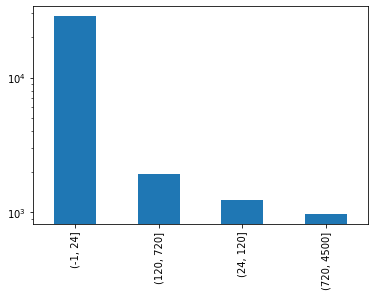

In [276]:
draw_hist_rebin(joined_data[joined_data['day_x'] < '2021-05-01'], 'time_diff', [-1,24,120,720, 4500], True)

## Drop one week data for post in order to have a better estimation on # of comments for each post 

In [236]:
joined_data = joined_data[joined_data['day_x'] <= '2021-05-25']

In [280]:
joined_data.head()

,id,day_x,utc_x,author_x,author_created_utc_x,url_x,day_y,utc_y,author_y,author_created_utc_y,url_y,post_id,time_diff
45534,nl7tdx,2021-05-25,1622001554,u/Single_Algae_3530,1.611770e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,2021-05-26,1.622005e+09,u/Single_Algae_3530,1.611770e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,nl7tdx,1
45535,nl7tdx,2021-05-25,1622001554,u/Single_Algae_3530,1.611770e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,2021-05-26,1.622005e+09,u/Single_Algae_3530,1.611770e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,nl7tdx,0
45536,nl7tdx,2021-05-25,1622001554,u/Single_Algae_3530,1.611770e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,2021-05-26,1.622005e+09,u/Single_Algae_3530,1.611770e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,nl7tdx,0
45537,nl7tdx,2021-05-25,1622001554,u/Single_Algae_3530,1.611770e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,2021-05-26,1.622005e+09,u/Single_Algae_3530,1.611770e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,nl7tdx,0
45538,nl7tdx,2021-05-25,1622001554,u/Single_Algae_3530,1.611770e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,2021-05-26,1.622005e+09,u/Captain_Bonez,1.545600e+09,https://www.reddit.com/r/SHIBArmy/comments/nl7...,nl7tdx,0


## Group the data by post id, treating each post as a node in the network
Note that at this point, we allow multi-links and self-multi-links for target node

In [238]:
group_by_id = joined_data.groupby('id').aggregate(['max','count'])

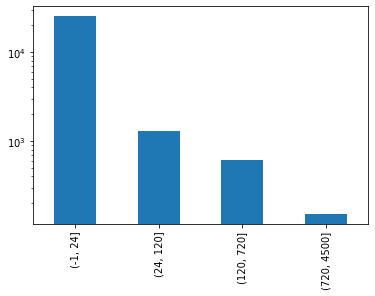

In [286]:
# draw the max time diff hist, aiming at last comment of each post
draw_hist_rebin(group_by_id['time_diff'], 'max', [-1,24,120,720, 4500], True)

In [216]:
group_by_id['time_diff']['max'].describe()

count    31090.000000
mean        18.276166
std        127.520575
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max       4319.000000
Name: max, dtype: float64

In [304]:
group_by_id['time_diff']['count'][0:5]

id
i32i8a     9
l8hegz     3
l8nvae     1
l8rl9f     1
l8usb3    13
Name: count, dtype: int64

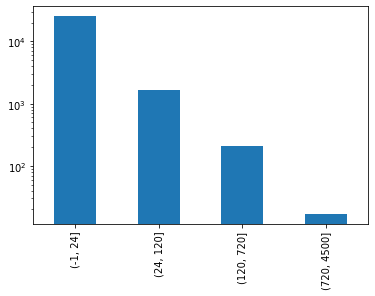

In [289]:
draw_hist_rebin(group_by_id['time_diff'], 'count', [-1,24,120,720, 4500], True)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 4500]


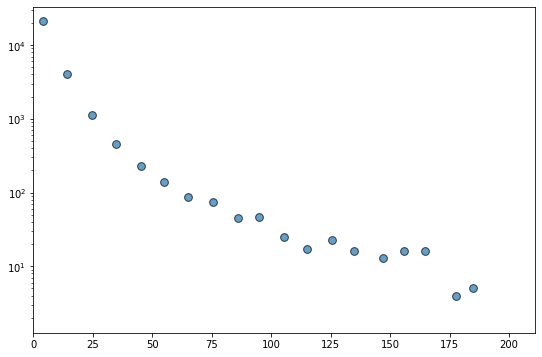

In [388]:
import matplotlib.pyplot as plt
def draw_hist_weighted_rebin(data, col, bins, logy, igore_bins = 2):
    def find_bin(bins, value):
        l = 0
        r = len(bins) - 1
        while l < r:
            mid = (l + r) // 2 + 1
            if bins[mid] > value:
                r = mid - 1
            else:
                l = mid
        return l
    container = [[] for i in range(len(bins))]
    if col is not None:
        for count in data[col]:
            ind = find_bin(bins, count)
            container[ind].append(count)
    else:
        for count in data:
            ind = find_bin(bins, count)
            container[ind].append(count)
    #print(container)
    x = [sum(i) / len(i) for i in container]
    y = [len(i) for i in container]
    
    fig, ax = plt.subplots(figsize = (9, 6))
    ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k");
    ax.set_yscale("log");
    plt.xlim([0, bins[len(bins) - igore_bins] + 20])
bins = [i for i in range(1, 201, 10)]
bins.append(4500)
print(bins)
draw_hist_weighted_rebin(group_by_id['time_diff'], 'count', bins, True, 2)

In [291]:
# Check users that make a post
print(len(group_by_id['author_x'][max].unique()))
print(group_by_id.shape)

11932
(27396, 24)


In [290]:
# Check the rate of reply made by author of the post
joined_data[joined_data['author_x'] == joined_data['author_y']].shape[0] / joined_data.shape[0] * 100

14.985851006327303

## Group the data by user id, treating each user as a node in the network
Note that at this point, we allow multi-links and self-multi-links for target node

In [229]:
group_by_name = joined_data.groupby('author_x').aggregate(['max','count'])

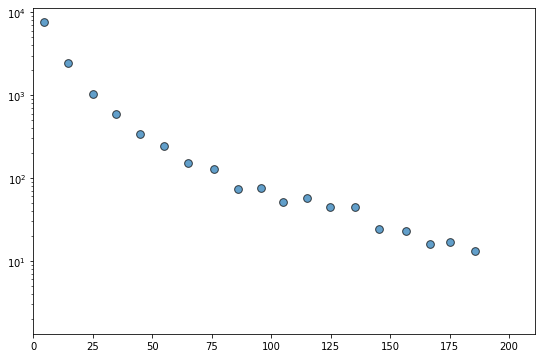

In [361]:
bins = [i for i in range(1, 201, 10)]
bins.append(4500)
draw_hist_weighted_rebin(group_by_name['time_diff'], 'count', bins, True)

## Previous plots allow multi-links and self-links for each node. From this point, we will remove those dup and self links

In [347]:
joined_data_groupby_id_remove_dup = joined_data[['id', 'author_x', 'author_y']].groupby('id').author_y.nunique()

In [373]:
joined_data_groupby_author_remove_dup = joined_data[['id', 'author_x', 'author_y']].groupby('author_x').author_y.nunique()


In [349]:
joined_data_remove_author = joined_data[['id', 'author_x', 'author_y']][joined_data[['id', 'author_x', 'author_y']]['author_x'] != joined_data[['id', 'author_x', 'author_y']]['author_y']]

In [351]:
joined_data_remove_author_groupby_id_remove_dup = joined_data_remove_author[['id', 'author_x', 'author_y']].groupby('id').author_y.nunique()
joined_data_remove_author_groupby_author_remove_dup = joined_data_remove_author[['id', 'author_x', 'author_y']].groupby('author_x').author_y.nunique()

## Multi-comments by the same user count as 1 link, treat each post as a node

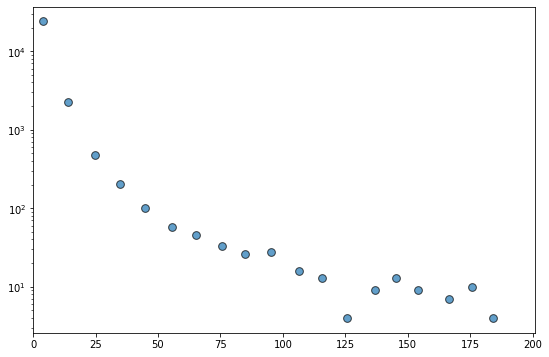

In [391]:
bins = [i for i in range(1, 201, 10)]
#bins.append(4500)
draw_hist_weighted_rebin(joined_data_groupby_id_remove_dup, None, bins, True)

## Multi-comments by the same user count as 1 link, treat each user as a node

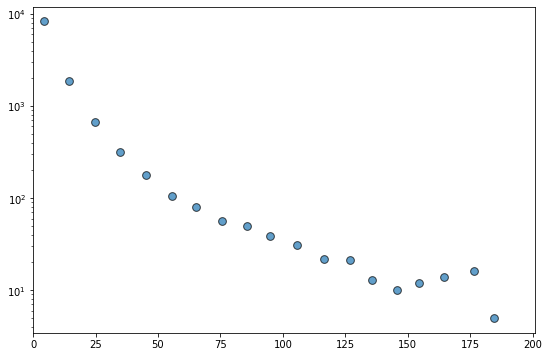

In [392]:
draw_hist_weighted_rebin(joined_data_groupby_author_remove_dup, None, bins, True)

## Further remove comments from author who post the post, treat each post as a node

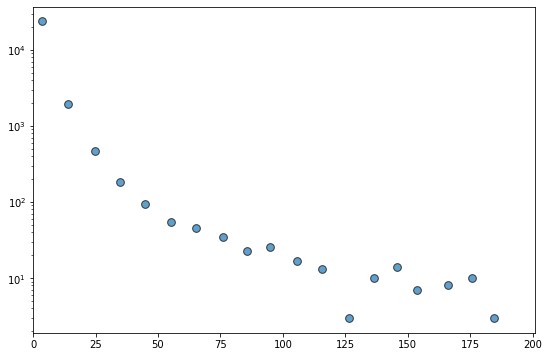

In [393]:
draw_hist_weighted_rebin(joined_data_remove_author_groupby_id_remove_dup, None, bins, True)

## Further remove comments from author who post the post, treat each user as a node

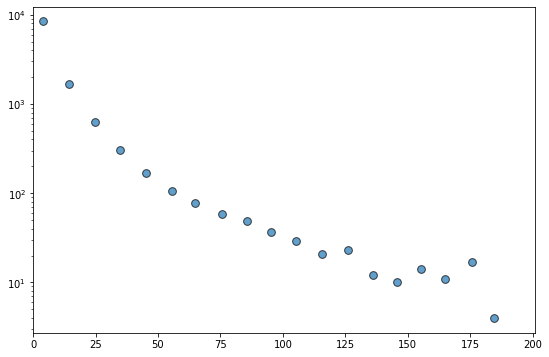

In [394]:
draw_hist_weighted_rebin(joined_data_remove_author_groupby_author_remove_dup, None, bins, True)